# Ames Housing Data Analysis: Pre-processing & Feature Engineering

In this notebook, we immediately proceed with reading in the cleaned datasets that were prepared in the *Cleaning and Exploratory Data Analysis* notebook.

# Pre-processing

## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 50


## Read in the cleaned datasets and inspect first 3 rows

We first import the *train* and *test* datasets that were cleaned during the <b>Cleaning & Exploratory Data Analysis</b> phase.

In [2]:
x_train = pd.read_csv('../data/x_train_cleaned.csv', index_col=0)
y_train = pd.read_csv('../data/y_train_cleaned.csv', index_col=0)
x_test = pd.read_csv('../data/x_test_cleaned.csv', index_col=0)

In [3]:
x_train.head(3)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,C060,RL,69.0,13517,2,Lvl,3,CulDSac,2,Sawyer,RRAe,1Fam,2Story,6,8,1976,2005,Gable,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,4,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,7,0,Attchd,2,475.0,3,3,2,0,44,0,0,0,0,0,0,3,2010,WD
1,C060,RL,43.0,11492,2,Lvl,3,CulDSac,2,SawyerW,Norm,1Fam,2Story,7,5,1996,1997,Gable,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,4,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,7,3,Attchd,2,559.0,3,3,2,0,74,0,0,0,0,0,0,4,2009,WD
2,C020,RL,68.0,7922,3,Lvl,3,Inside,2,NAmes,Norm,1Fam,1Story,5,7,1953,2007,Gable,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,2,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,7,0,Detchd,1,246.0,3,3,2,0,52,0,0,0,0,0,0,1,2010,WD


In [4]:
y_train.head(3)

,SalePrice
0,130500
1,220000
2,109000


In [5]:
x_test.head(3)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,C190,RM,69.0,9142,3,Lvl,3,Inside,2,OldTown,Norm,2fmCon,2Story,6,8,1910,1950,Gable,AsbShng,AsbShng,None,0.0,2,1,Stone,2,3,1,1,0,1,0,1020,1020,3,1,908,1020,0,1928,0,0,2,0,4,2,1,7,0,Detchd,1,440,1,1,2,0,60,112,0,0,0,0,0,4,2006,WD
1,C090,RL,70.0,9662,2,Lvl,3,Inside,2,Sawyer,Norm,Duplex,1Story,5,4,1977,1977,Gable,Plywood,Plywood,None,0.0,2,2,CBlock,4,3,1,1,0,1,0,1967,1967,2,4,1967,0,0,1967,0,0,2,0,6,2,2,7,0,Attchd,3,580,3,3,2,170,0,0,0,0,0,0,0,8,2006,WD
2,C060,RL,58.0,17104,2,Lvl,3,Inside,2,Gilbert,Norm,1Fam,2Story,7,5,2006,2006,Gable,VinylSd,VinylSd,None,0.0,3,2,PConc,4,4,3,6,554,1,0,100,654,4,4,664,832,0,1496,1,0,2,1,3,1,3,7,4,Attchd,2,426,3,3,2,100,24,0,0,0,0,0,0,9,2006,New


## Create dummy variables for nominal columns

At this point, we observe that nominal columns such as `Neighborhood` and `Foundation` continue to hold data in string type, which would be inaccessible by regression analysis due to their non-numeric nature. In other words, regression modeling requires all independent (X) variables to be numerical.

We then proceed to create dummy variables for these nominal columns, where the number of new variables generated would be equal to the number of distinct values in the targeted nominal attribute. For example `Neighborhood` column has 28 distinct values, so a new column would be created for each of them. Each column will hold either *1* (presence) or *0* (absence) denoting which subset of *Neighborhood* the record belongs to. For the 82 records for the neighborhood *Mitchel*, their `Neighborhood_Mitchel` column would be marked with *1*, while 27 other neighborhood-centric dummy columns would be *0*. A chosen regression model can now utilise this `Neighborhood_Mitchel` variable (as well as the 27 other neighborhood dummy variables) to mathematically model the influence of the neighborhood attribute on the `SalePrice`.

Before we proceed with creating dummy variables, we need to deal with *NA* values in the `Garage Type` column in the original `x_train_cleaned.csv` and `x_test_cleaned.csv` files being treated as NaN:

In [6]:
x_train.loc[:,'Garage Type'] = x_train.loc[:,'Garage Type'].fillna('NA')
x_test.loc[:,'Garage Type'] = x_test.loc[:,'Garage Type'].fillna('NA')

In [7]:
x_train.loc[:,'Garage Type'].value_counts(dropna=False)

Attchd     1211
Detchd      535
BuiltIn     132
NA          114
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

After cleaning `Garage Type` column in both datasets, we utilise the pandas *get_dummies* function to *dummify* all the nominal attributes:

In [8]:
x_train_v2 = pd.get_dummies(x_train.loc[:,[col for col in x_train.columns]])
print('x_train_v2 shape after get_dummies: {}'.format(x_train_v2.shape))

# possible that a nominal value is not present in one of the nominal columns, resulting in more/lesser columns generated
x_test_v2 = pd.get_dummies(x_test.loc[:,[col for col in x_test.columns]])
print('x_test_v2 shape after get_dummies: {}'.format(x_test_v2.shape))

x_train_v2 shape after get_dummies: (2049, 195)
x_test_v2 shape after get_dummies: (879, 192)


## Sychronize columns in train and test datasets

Aftering *dummifying* all the nominal attributes in both dataset, it is observed that the resultant number of columns is no longer the same. This happens when certain values present in a particular nominal column in the samples of the `x_train` dataset are not present in the same nominal column in the samples of the `x_test` dataset, and vice versa.

To solve this problem, we simple cross-check the columns of both datasets against each other, then re-create the missing columns and initializing the whole column to 0 (since we know that the lack of a particular value is what caused the missing dummy column in the 1st place):

In [9]:
for col in x_train_v2.columns:
    if col not in x_test_v2.columns:
        print('\'{}\' found missing in x_test_v2, initialising new column with 0s.'.format(col))
        x_test_v2.loc[:,col] = 0
print('\n')
for col in x_test_v2.columns:
    if col not in x_train_v2.columns:
        print('\'{}\' found missing in x_train_v2, initialising new column with 0s.'.format(col))
        x_train_v2.loc[:,col] = 0
print('\n')
print('Check if both datasets have the same set of columns: {}'.format(set(x_train_v2.columns) == set(x_test_v2.columns)))
print('\n')
print('Current number of columns: {}'.format(x_train_v2.shape[1]))

# ensure that column sequence is similar too
column_list = list(x_train_v2.columns)
x_test_v2 = x_test_v2.loc[:,column_list]

'MS SubClass_C150' found missing in x_test_v2, initialising new column with 0s.
'MS Zoning_A (agr)' found missing in x_test_v2, initialising new column with 0s.
'Neighborhood_GrnHill' found missing in x_test_v2, initialising new column with 0s.
'Neighborhood_Landmrk' found missing in x_test_v2, initialising new column with 0s.
'Exterior 1st_CBlock' found missing in x_test_v2, initialising new column with 0s.
'Exterior 1st_ImStucc' found missing in x_test_v2, initialising new column with 0s.
'Exterior 1st_Stone' found missing in x_test_v2, initialising new column with 0s.
'Exterior 2nd_Stone' found missing in x_test_v2, initialising new column with 0s.


'Exterior 1st_PreCast' found missing in x_train_v2, initialising new column with 0s.
'Exterior 2nd_Other' found missing in x_train_v2, initialising new column with 0s.
'Exterior 2nd_PreCast' found missing in x_train_v2, initialising new column with 0s.
'Mas Vnr Type_CBlock' found missing in x_train_v2, initialising new column with 0s.
'

## Heatmap analysis of train dataset with dummy variables

Both `x_train_v2` and `x_test_v2` datasets now share the same set of columns after the dummifying process. Now that all columns are in numerical format, we plot the top 30 columns that are correlated to `SalePrice` again, to see if any of the new dummy attributes exhibit a strong relationship with the property price:

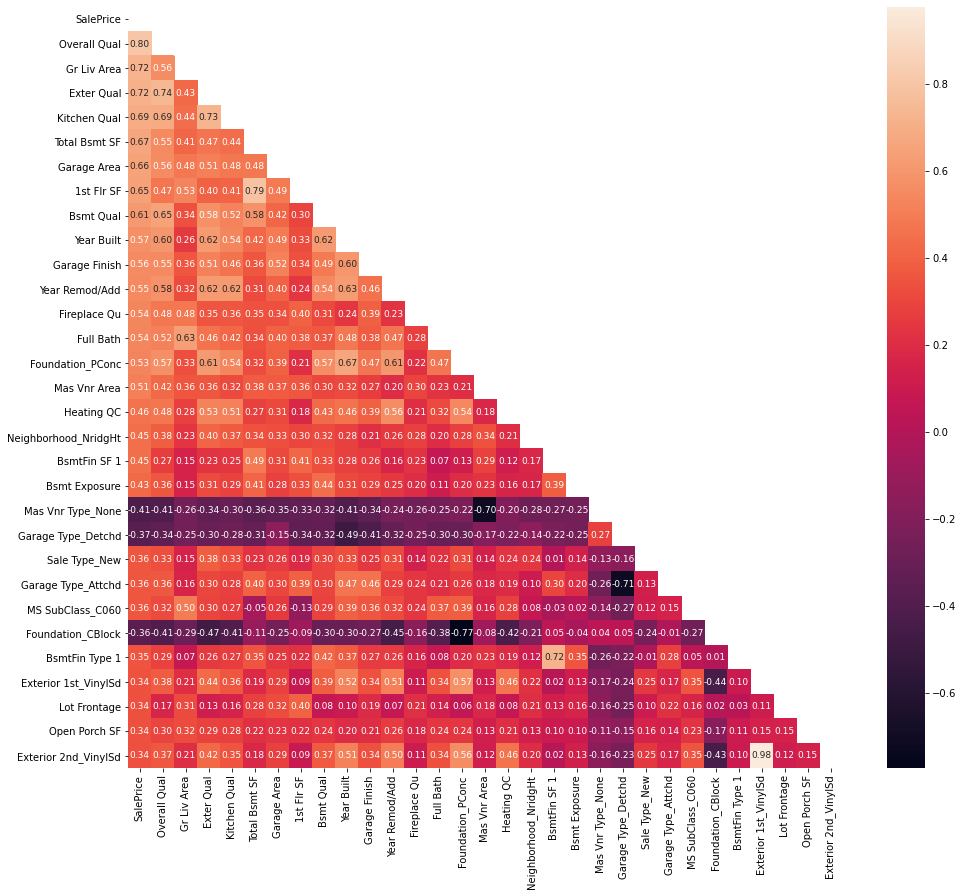

In [10]:
x_train_v2_with_label = pd.concat([x_train_v2, y_train], axis=1)
correlations_with_ref_to_saleprice = x_train_v2_with_label.corr().loc[:,'SalePrice']
top_correlations = correlations_with_ref_to_saleprice.abs().sort_values(ascending=False).head(31)

top_correlations = x_train_v2_with_label.loc[:,list(top_correlations.index)].corr()

mask = np.zeros_like(top_correlations)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 14))

g = sns.heatmap(top_correlations, annot=True, annot_kws={"size":9}, fmt='.2f', mask=mask)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

Interestingly, 10 dummy variables made it into the top 30 most correlated variables with `SalePrice`, with the strongest one being `Foundation_PConc` in 14th position with a correlation score of 0.53. This is in line with the earlier boxplot analysis, where the median price for property with *PConc* for `Foundation` column exceeded the inter-quartile ranges of all the other foundation sub-types, amongst the 6 nominal columns being analysed.

For attributes as critical as location in determining the price of a property, only `Neighborhood NridgeHt` was found at 17th position in the correlation matrix with score of 0.45. We likely need to proceed with feature engineering in order to create an attribute that could elucidate the importance of this location factor.

## Extract and save `baseline` set of predictors

At this point of time, we will save a set of columns that meed the correlation cut-off score of 0.10 to serve as predictors for our first model that uses features for regression. As a base model, we will not prejudice aginst any of the features, proceed with the model training and evaluation, then see what enhancements we can build upon this base model.

In [11]:
threshold_correlation_score = 0.10

# get top 50 correlation dataframe
#top_50_corr = correlations_with_ref_to_saleprice.abs()[lambda x: x >= threshold_correlation_score].sort_values(ascending=False).head(181)
filtered_corr = correlations_with_ref_to_saleprice \
                    .abs()[lambda x: x >= threshold_correlation_score] \
                    .sort_values(ascending=False)

# get index which would contain the column names, and take out the target
filtered_corr_columns = [col for col in list(filtered_corr.index) if col != 'SalePrice']

print('Number of filtered columns: {}'.format(len(filtered_corr_columns)))
#print(filtered_corr_columns)

# get baseline predictors for train
train_baseline = x_train_v2.loc[:,filtered_corr_columns]
print('train_baseline shape: {}'.format(train_baseline.shape))

# get baseline predictors for test
test_baseline = x_test_v2.loc[:,filtered_corr_columns]
print('test_baseline shape: {}'.format(test_baseline.shape))

Number of filtered columns: 101
train_baseline shape: (2049, 101)
test_baseline shape: (879, 101)


In [12]:
# save the predictor set for the baseline train and test
train_baseline.to_csv('../data/x_train_baseline.csv')
test_baseline.to_csv('../data/x_test_baseline.csv')

# Feature Engineering

## Creating `Age at sale` attribute

The `Year Built` column can give an indication of the age at which the property is sold, so we build a new `Age at sale` column:

In [13]:
x_train.loc[:,'Age at sale'] = x_train.loc[:,'Yr Sold'] - x_train.loc[:,'Year Built']
#x_train.drop(columns=['Year Built'], inplace=True)
x_test.loc[:,'Age at sale'] = x_test.loc[:,'Yr Sold'] - x_test.loc[:,'Year Built']
#x_test.drop(columns=['Year Built'], inplace=True)
x_train.loc[:,'Age at sale'].describe()

count    2049.000000
mean       36.102489
std        30.204176
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: Age at sale, dtype: float64

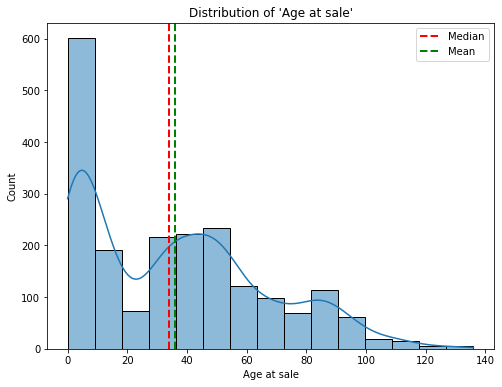

In [14]:
plt.figure(figsize=(8,6))

sns.histplot(data=x_train, x='Age at sale',bins=15, kde=True)
plt.axvline(x_train.loc[:,'Age at sale'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(x_train.loc[:,'Age at sale'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of \'Age at sale\'')
plt.legend()
plt.show()

Distribution of `Age at sale` is very right-skewed, with the mode indicating that majority of the properties sold were 10 years old or newer. Mean age is around 36.1 years.

In [15]:
def build_sorted_correlation_with_SalePrice(dataframe, column_list):
    raw_correlation = dataframe.loc[:, column_list + ['SalePrice']] \
                               .corr() \
                               .loc[:,'SalePrice']
    sorted_correlations = raw_correlation.abs().sort_values(ascending=False)
    sorted_correlations = dataframe.loc[:,list(sorted_correlations.index)] \
                                   .corr() \
                                   .rename(columns={'SalePrice': 'Correlation Score'})
    return sorted_correlations.loc[:,['Correlation Score']]

In [16]:
age_centric_columns = ['Year Built', 'Yr Sold']
build_sorted_correlation_with_SalePrice(
    pd.concat([x_train, y_train], axis=1), 
    ['Age at sale'] + age_centric_columns)

,Correlation Score
SalePrice,1.000000
Age at sale,-0.572441
Year Built,0.572405
Yr Sold,-0.015174


Based on the newly compiled correlation scores, `Age at sale` is ever slightly better than `Year Built` and other age-centric attributes for a given property. Furthermore, `Age at sale` is now negatively correlated with `SalePrice`, which indicates that all else being equal, and older property would command a lower sale price than a newer one.

We then proceed to keep `Age at sale`, while dropping `Year Built` and `Yr Sold`:

In [17]:
x_train.drop(columns=age_centric_columns, errors='ignore', inplace=True)
x_test.drop(columns=age_centric_columns, errors='ignore', inplace=True)
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (2049, 65)
x_test shape: (879, 65)


## Creating `Total SF` attribute:

There are several attributes documenting the areas of the various segments of a given property. Their statistical overview are as follows:

In [18]:
area_columns = ['Total Bsmt SF','1st Flr SF','2nd Flr SF','Garage Area','Pool Area','3Ssn Porch','Screen Porch','Wood Deck SF','Open Porch SF','Enclosed Porch','Mas Vnr Area','Low Qual Fin SF']
x_train.loc[:,area_columns].describe()

,Total Bsmt SF,1st Flr SF,2nd Flr SF,Garage Area,Pool Area,3Ssn Porch,Screen Porch,Wood Deck SF,Open Porch SF,Enclosed Porch,Mas Vnr Area,Low Qual Fin SF
count,2049.000000,2049.000000,2049.00000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1053.035627,1160.848219,329.18692,472.647633,2.165935,2.593948,16.527574,93.554417,47.224500,22.593948,97.736945,5.518302
std,426.814420,379.066122,425.59571,214.703467,36.297124,25.241801,57.399890,128.195671,65.857797,59.870165,171.936400,51.093509
min,0.000000,334.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,793.000000,879.000000,0.00000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,994.000000,1092.000000,0.00000,480.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000
75%,1317.000000,1404.000000,691.00000,576.000000,0.000000,0.000000,0.000000,168.000000,70.000000,0.000000,158.000000,0.000000
max,3206.000000,3820.000000,1862.00000,1356.000000,800.000000,508.000000,490.000000,1424.000000,547.000000,432.000000,1600.000000,1064.000000


We could actually create a new attribute `Total SF`, which essentially sums up all these columns to give the total area occupied by a given property:

In [19]:
x_train.loc[:,'Total SF'] = x_train.loc[:,area_columns].sum(axis=1)

Finally, we inspect their correlations with `SalePrice`, alongside the new attribute, as well as `Gr Liv Area` which in the previous heatmap analysis proved to have a very strong relationship with the property price:

In [20]:
build_sorted_correlation_with_SalePrice(
    pd.concat([x_train, y_train], axis=1), 
    area_columns + ['Gr Liv Area','Total SF'])

,Correlation Score
SalePrice,1.000000
Total SF,0.865179
Gr Liv Area,0.719463
Total Bsmt SF,0.665116
Garage Area,0.655097
1st Flr SF,0.648252
Mas Vnr Area,0.511273
Open Porch SF,0.338545
Wood Deck SF,0.327629
2nd Flr SF,0.248826


As shown in the above correlation score table, the new `Total SF` attribute has shown a strong positive relationship with `SalePrice`, even stronger than the original `Gr Liv Area`. In the interest of reducing as much multicollinearity in the set of predictors, we will keep `Total SF`, while dropping the rest of the area-centric attributes:

In [21]:
#area_columns = area_columns + ['Gr Liv Area']

x_train.drop(columns=area_columns + ['Gr Liv Area'], errors='ignore', inplace=True)

x_test.loc[:,'Total SF'] = x_test.loc[:,area_columns].sum(axis=1)

x_test.drop(columns=area_columns + ['Gr Liv Area'], errors='ignore', inplace=True)
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (2049, 53)
x_test shape: (879, 53)


## Creating `Neighborhood Score` attribute:

As mentioned earlier, location is one of the major factors in determining the price of a property in the real world. A building may have the best quality construction, but if constructed in a shabby area of the city, would have it's price negatively impacted, compared to a building of similar quality in an upscale, well-maintained area. Similarly, a rundown building in a well-kept neighborhood can still fetch a slightly better than expected price, compared to a similar one in a lousy neighborhood. This is an example of an external factor that could affect sale price of a property in the real world.

For a location such as a neighborhood, its entire outlook is likely intrinsic to the aggregate quality and condition of the buildings within it, both in exterior facade and interior fittings. Fortunately, we do have such attributes in the `x_train` dataset:

In [22]:
quality_columns = ['Overall Qual','Overall Cond', 'Exter Qual','Bsmt Qual','Exter Cond',
                   'Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual', 'Garage Cond']
x_train.loc[:,quality_columns].describe()

,Overall Qual,Overall Cond,Exter Qual,Bsmt Qual,Exter Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,6.108346,5.562714,2.404588,3.488531,2.085896,3.157638,2.515861,1.761347,2.802831,2.810151
std,1.421780,1.104897,0.586134,0.900841,0.372965,0.964224,0.664287,1.806604,0.721579,0.716419
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000,3.000000,3.000000
50%,6.000000,5.000000,2.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,3.000000
75%,7.000000,6.000000,3.000000,4.000000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000
max,10.000000,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000


These ordinal attributes can be combined into a single attribute `Aggregated Qual`:

In [23]:
x_train.loc[:,'Aggregated Qual'] = x_train.loc[:,quality_columns].sum(axis=1)

Now that every property record has an `Aggregated Qual` column, we can group these property by their neighborhood designation, then build a mean score for every neighhorhood:

In [24]:
# perform groupby on `Neighborhood`, then aggregate via averaging
neighborhood_scores = x_train.loc[:,['Neighborhood','Aggregated Qual']].groupby('Neighborhood').agg(Mean_Agg_Score=('Aggregated Qual', np.mean))

# sort dataframe by descending order of the mean score
neighborhood_scores.sort_values(by='Mean_Agg_Score', ascending=False, inplace=True)

# extract out neighborhood names from the index
neighborhood_scores.loc[:,'Neighborhood'] = neighborhood_scores.index

# reset index to the usual numeric form
neighborhood_scores.reset_index(drop=True, inplace=True)

# re-arrange columns to being Neighborhood to left-most position
neighborhood_scores = neighborhood_scores.loc[:,['Neighborhood','Mean_Agg_Score']]

neighborhood_scores

,Neighborhood,Mean_Agg_Score
0,NridgHt,40.459016
1,StoneBr,39.421053
2,NoRidge,38.604167
3,Veenker,37.705882
4,Blmngtn,37.681818
5,Timber,36.770833
6,Somerst,36.492308
7,Greens,36.000000
8,Crawfor,35.436620
9,Blueste,35.000000


`Neighborhood`, a nominal attribute, now has a newly engineered ordinal attribute, `Neighborhood Score`, associated with it. This new value can be assigned back to the property records in the following manner:

In [25]:
def get_score(x):
    return neighborhood_scores.loc[neighborhood_scores.loc[:,'Neighborhood']==x,'Mean_Agg_Score'].values[0]

# build the newly engineered attribute, call it Neighborhood Score
x_train.loc[:,'Neighborhood Score'] = x_train.loc[:,'Neighborhood'].apply(get_score)

With this new attribute `Neighborhood Score`, we test the strength of its relationship with `SalePrice`, along with the 28 other dummy variables derived from the original `Neighborhood` column:

In [26]:
neighborhood_dummies = x_train_v2.loc[:,[c for c in x_train_v2 if c.startswith('Neighborhood_')]]
build_sorted_correlation_with_SalePrice(
    pd.concat([x_train.loc[:,['Neighborhood Score']], y_train, neighborhood_dummies], axis=1), 
    ['Neighborhood Score'] + list(neighborhood_dummies.columns))

,Correlation Score
SalePrice,1.000000
Neighborhood Score,0.726743
Neighborhood_NridgHt,0.448639
Neighborhood_NoRidge,0.263385
Neighborhood_StoneBr,0.256968
Neighborhood_OldTown,-0.208418
Neighborhood_NAmes,-0.189456
Neighborhood_IDOTRR,-0.189266
Neighborhood_Edwards,-0.176848
Neighborhood_Somerst,0.150056


`Neighborhood Score` attribute has outperformed all the other 28 dummy variables, to give a correlation score of around 0.73, and is a decent candidate for a predictor in the upcoming modeling phase. At this point, we make a decision to keep the `Neighborhood Score`, and drop `Neighborhood`:

In [27]:
x_train.drop(columns=['Neighborhood','Aggregated Qual'], errors='ignore', inplace=True)

In [28]:
x_train.shape

(2049, 53)

In [29]:
x_test.loc[:,'Aggregated Qual'] = x_test.loc[:,quality_columns].sum(axis=1)

x_test.loc[:,'Neighborhood Score'] = x_test.loc[:,'Neighborhood'].apply(get_score)

x_test.drop(columns=['Neighborhood','Aggregated Qual'], errors='ignore', inplace=True)
x_test.shape

(879, 53)

## Creating `Interior Score` attribute:

Apart from the exterior facade, the quality and condition of the interior features of a property should rightfully have influence on its overall price. We start by identifying the columns that capture the quality and condition ratings of the moajor components inside a property, such as the kitchen and the fireplace:

In [30]:
interior_columns = ['Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Electrical', 'Kitchen Qual', 
                    'Fireplace Qu', 'Garage Qual', 'Garage Cond']

Next, we add up these columns to form a new variable `Interior Qual`:

In [31]:
x_train.loc[:,'Interior Qual'] = x_train.loc[:,interior_columns].sum(axis=1)

In [32]:
interior_df = x_train_v2.loc[:, interior_columns]
build_sorted_correlation_with_SalePrice(
    pd.concat([x_train.loc[:,['Interior Qual']], y_train, interior_df], axis=1), 
    ['Interior Qual'] + interior_columns)

,Correlation Score
SalePrice,1.000000
Interior Qual,0.726980
Kitchen Qual,0.694295
Bsmt Qual,0.613236
Fireplace Qu,0.539484
Heating QC,0.458636
Garage Qual,0.285328
Garage Cond,0.265066
Electrical,0.247890
Bsmt Cond,0.225096


In [33]:
x_train.drop(columns=interior_columns, errors='ignore', inplace=True)
x_train.shape

(2049, 46)

In [34]:
x_test.loc[:,'Interior Qual'] = x_test.loc[:,interior_columns].sum(axis=1)

x_test.drop(columns=interior_columns, errors='ignore', inplace=True)
x_test.shape

(879, 46)

## Heatmap analysis of train dataset with newly engineered features

With our newly engineered features and dropping of a few more columns, we re-examine the correlation of the attributes with `SalePrice`:

In [35]:
x_train_v3 = pd.get_dummies(x_train.loc[:,[col for col in x_train.columns]])
print('x_train_v3 shape after get_dummies: {}'.format(x_train_v3.shape))

x_train_v3 shape after get_dummies: (2049, 148)


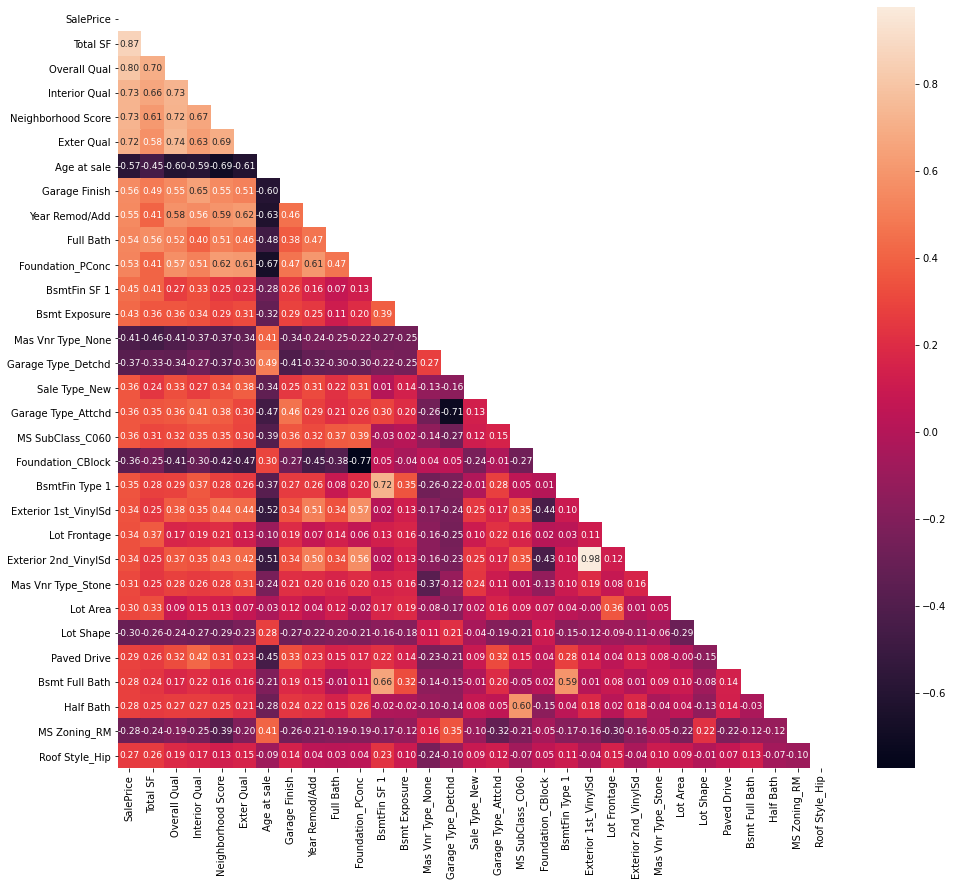

In [36]:
x_train_v3_with_label = pd.concat([x_train_v3, y_train], axis=1)
correlations_with_ref_to_saleprice = x_train_v3_with_label.corr().loc[:,'SalePrice']
top_correlations = correlations_with_ref_to_saleprice.abs().sort_values(ascending=False).head(31)

top_correlations = x_train_v3_with_label.loc[:,list(top_correlations.index)].corr()

mask = np.zeros_like(top_correlations)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 14))

g = sns.heatmap(top_correlations, annot=True, annot_kws={"size":9}, fmt='.2f', mask=mask)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

The above heatmap now shows the new features `Total SF`, `Neighborhood Score`, `Age at sale` made it into the top 10 most correlated features with `SalePrice`.

## Extract and save `reduced and engineered` set of predictors

At this point, we perform the same extraction of features that meet the correlation cutoff score of 0.20, and designate this set as the *reduced and engineered* train dataset. Same column treatment would be repeated for the test dataset too:

In [37]:
higher_threshold_correlation_score = 0.20

# get top 50 correlation dataframe
reduced_filtered_corr = correlations_with_ref_to_saleprice.abs()[lambda x: x > higher_threshold_correlation_score].sort_values(ascending=False).head(51)

# get index which would contain the column names, and take out the target
reduced_filtered_corr_columns = [col for col in list(reduced_filtered_corr.index) if col != 'SalePrice']

print('Number of columns: {}'.format(len(reduced_filtered_corr_columns)))
print(reduced_filtered_corr_columns)

# get reduced and engineered predictors for train
train_reduced_and_engineered = x_train_v3.loc[:,reduced_filtered_corr_columns]
print('train_reduced_and_engineered shape: {}'.format(train_reduced_and_engineered.shape))

x_test_v3 = pd.get_dummies(x_test.loc[:,[col for col in x_test.columns if col not in ['Id', 'PID']]])
# get reduced and engineered predictors for test
test_reduced_and_engineered = x_test_v3.loc[:,reduced_filtered_corr_columns]
print('test_benchmark shape: {}'.format(test_reduced_and_engineered.shape))

Number of columns: 40
['Total SF', 'Overall Qual', 'Interior Qual', 'Neighborhood Score', 'Exter Qual', 'Age at sale', 'Garage Finish', 'Year Remod/Add', 'Full Bath', 'Foundation_PConc', 'BsmtFin SF 1', 'Bsmt Exposure', 'Mas Vnr Type_None', 'Garage Type_Detchd', 'Sale Type_New', 'Garage Type_Attchd', 'MS SubClass_C060', 'Foundation_CBlock', 'BsmtFin Type 1', 'Exterior 1st_VinylSd', 'Lot Frontage', 'Exterior 2nd_VinylSd', 'Mas Vnr Type_Stone', 'Lot Area', 'Lot Shape', 'Paved Drive', 'Bsmt Full Bath', 'Half Bath', 'MS Zoning_RM', 'Roof Style_Hip', 'Mas Vnr Type_BrkFace', 'Roof Style_Gable', 'MS SubClass_C030', 'MS Zoning_RL', 'Garage Type_NA', 'Foundation_BrkTil', 'Garage Type_BuiltIn', 'Sale Type_WD ', 'Land Contour_HLS', 'House Style_2Story']
train_reduced_and_engineered shape: (2049, 40)
test_benchmark shape: (879, 40)


In [38]:
# save the predictor set for the baseline train and test
train_reduced_and_engineered.to_csv('../data/x_train_reduced_and_engineered.csv')
test_reduced_and_engineered.to_csv('../data/x_test_reduced_and_engineered.csv')

# Conclusion

## Summary of transformations performed on datasets

The following transformations were performed during data pre-processing:

- One-hot-encoding and manual column synchronization actions created 134 dummy columns, bringing total column count to 200.

The following removals were performed during exploratory feature engineering:

- Created `Age at sale` feature, while dropping `Year Built` and `Yr Sold` columns.

- Created `Total SF` feature, while dropping 13 other area-centric columns.

- Created `Neighborhood Score` feature, while dropping the 28 one-hot-encoded neighborhood-centric columns.

- Created `Interior Score` feature, while dropping 8 other interior-centric quality and condition rating columns.

Baseline set of 101 features was created at end of pre-processing when a correlation cutoff score of 0.10 provided a way to filter from the original 200 features, and saved as `x_train_baseline.csv` and `x_test_baseline.csv`.

Smaller `reduced and engineered` set of 40 features was created at end of feature-engineering when a correlation cutoff score of 0.20 provided a way to reduce the number of accepted features, and saved as `x_train_reduced_and_engineered.csv` and `x_test_reduced_and_engineered.csv`.

The above datasets would be used for the later phase of *Model Training, Tuning & Benchmarking*.